In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Read CSV file
df = pd.read_csv("../data/raw/TSLA_2020-01-01_2025-05-28.csv")

# Preview the first few rows
df

,Date,Close,High,Low,Open,Volume
0,NaN,TSLA,TSLA,TSLA,TSLA,TSLA
1,2020-01-02,28.68400001525879,28.713333129882812,28.11400032043457,28.299999237060547,142981500
2,2020-01-03,29.534000396728516,30.266666412353516,29.128000259399414,29.366666793823242,266677500
3,2020-01-06,30.1026668548584,30.104000091552734,29.333332061767578,29.364667892456055,151995000
4,2020-01-07,31.270666122436523,31.441999435424805,30.224000930786133,30.760000228881836,268231500
...,...,...,...,...,...,...
1353,2025-05-20,343.82000732421875,354.989990234375,341.6300048828125,347.8699951171875,131715500
1354,2025-05-21,334.6199951171875,347.3500061035156,332.20001220703125,344.42999267578125,102354800
1355,2025-05-22,341.0400085449219,347.2699890136719,331.3900146484375,331.8999938964844,97113400
1356,2025-05-23,339.3399963378906,343.17999267578125,333.2099914550781,337.9200134277344,84654800


In [21]:
# Display data types of each column
df.dtypes

Date      object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [22]:
# Drop the first row (e.g., a row containing 'TSLA')
df = df.drop(index=0).reset_index(drop=True)
df.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-02,28.68400001525879,28.713333129882812,28.11400032043457,28.299999237060547,142981500
1,2020-01-03,29.534000396728516,30.266666412353516,29.128000259399414,29.366666793823242,266677500
2,2020-01-06,30.1026668548584,30.104000091552734,29.333332061767578,29.364667892456055,151995000
3,2020-01-07,31.270666122436523,31.441999435424805,30.224000930786133,30.760000228881836,268231500
4,2020-01-08,32.80933380126953,33.232666015625,31.215333938598633,31.579999923706055,467164500


In [23]:
# Convert specified columns to appropriate numeric and datetime types, and set 'Date' as index
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [24]:
# Display data types of each column again
df.dtypes

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [25]:
# Check for missing values in each column
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

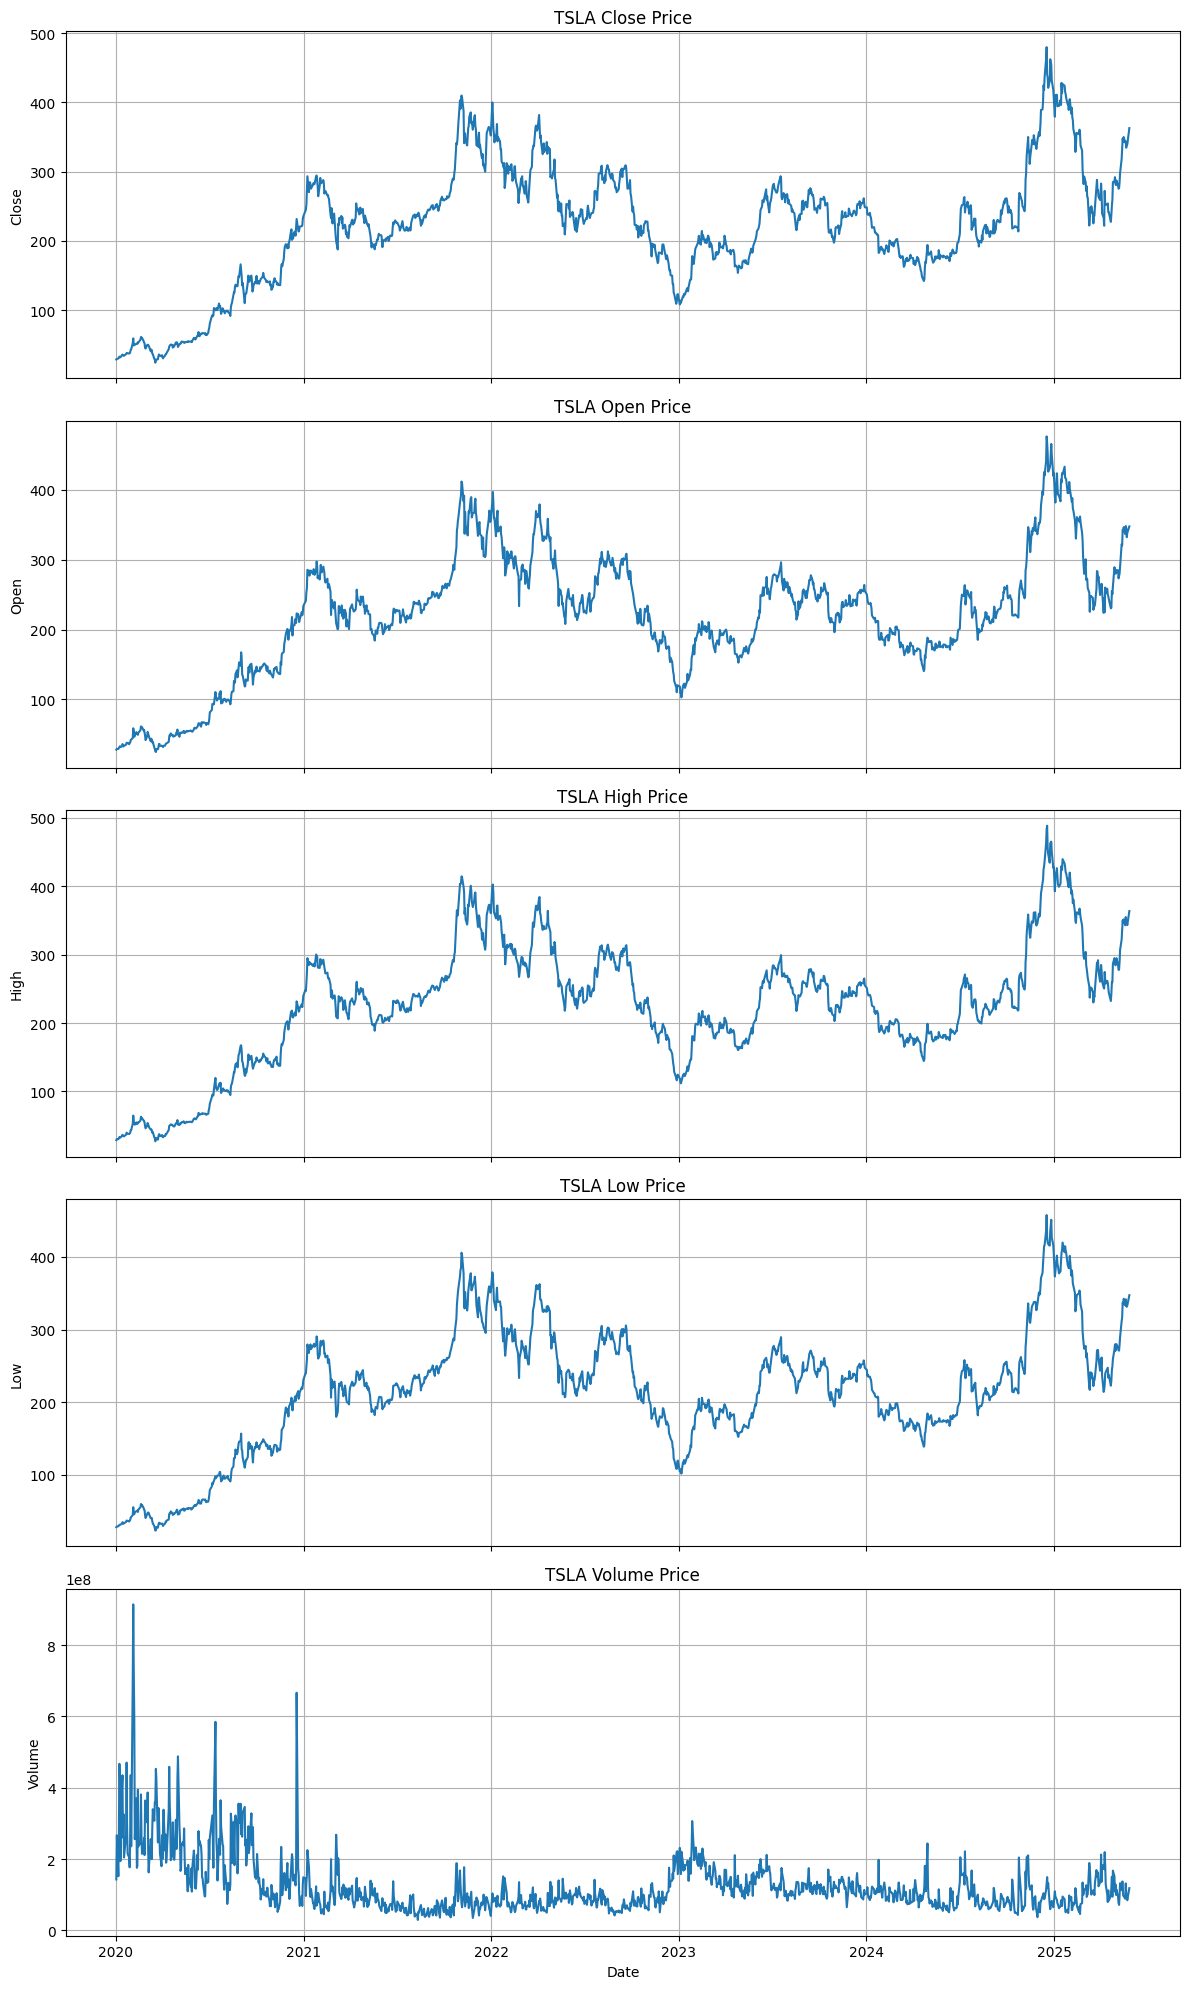

In [26]:
# Plot time series line charts for selected TSLA stock features in separate subplots
cols_to_plot = ['Close', 'Open', 'High', 'Low', 'Volume']

fig, axes = plt.subplots(len(cols_to_plot), 1, figsize=(12, 4 * len(cols_to_plot)), sharex=True)

for i, col in enumerate(cols_to_plot):
    sns.lineplot(data=df, x='Date', y=col, ax=axes[i])
    axes[i].set_title(f'TSLA {col} Price')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

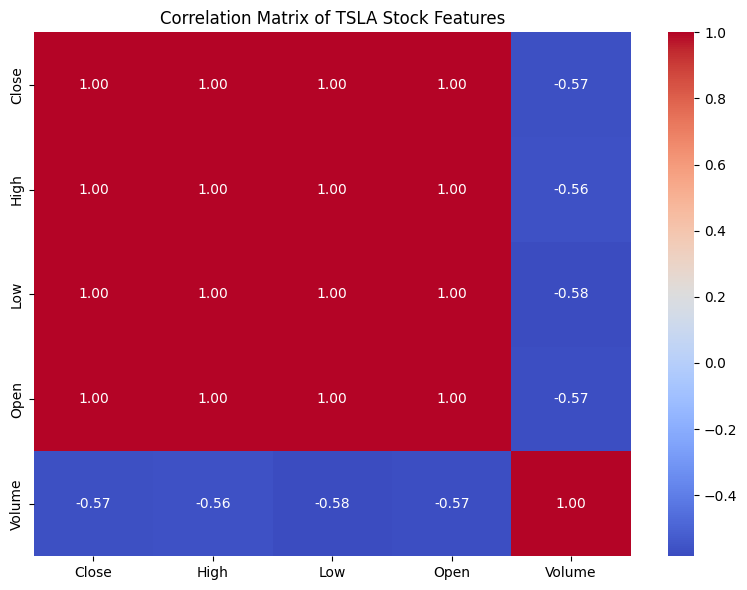

In [27]:
# Visualize feature correlations using a heatmap of the numeric columns
df_numerical = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numerical.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of TSLA Stock Features")
plt.tight_layout()
plt.show()